[View in Colaboratory](https://colab.research.google.com/github/priyasin01/Alexnet-Implementation-and-training-using-Keras/blob/master/AlexnetUsingKeras.ipynb)

In [0]:
!pip install tflearn

In [0]:
import os
import zipfile

local_zip = '/content/dog.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('tmp/')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/dog.zip' mode='r'>>

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt


In [0]:
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential

In [0]:
img_input = layers.Input(shape=(227,227,3))

conv_1 = layers.Conv2D(96,11,4,'valid',activation='relu')(img_input)
conv_1 = layers.MaxPool2D(2,2,'valid')(conv_1)
conv_1 = layers.BatchNormalization()(conv_1)

conv_2 = layers.Conv2D(256,11,1,'valid',activation='relu')(conv_1)
conv_2 = layers.MaxPool2D(2,2,'valid')(conv_2)
conv_2 = layers.BatchNormalization()(conv_2)

conv_3 = layers.Conv2D(384,3,1,'valid',activation='relu')(conv_2)
conv_3 = layers.BatchNormalization()(conv_3)

conv_4 = layers.Conv2D(384,3,1,'valid',activation='relu')(conv_3)
conv_4 = layers.BatchNormalization()(conv_4)

conv_5 = layers.Conv2D(256,3,1,'valid',activation='relu')(conv_4)
conv_5 = layers.MaxPool2D(2,2,'valid')(conv_5)
conv_5 = layers.BatchNormalization()(conv_5)

dense_1 = layers.Flatten()(conv_5)

dense_1 = layers.Dense(4096,activation='relu')(dense_1)
dense_1 = layers.Dropout(0.4)(dense_1)
#dense_1 = layers.BatchNormalization()(dense_1)

dense_2 = layers.Dense(4096,activation='relu')(dense_1)
dense_2 = layers.Dropout(0.4)(dense_2)
#dense_2 = layers.BatchNormalization()(dense_2)

dense_3 = layers.Dense(1000,activation='relu')(dense_2)
dense_3 = layers.Dropout(0.3)(dense_3)
#dense_3 = layers.BatchNormalization()(dense_3)

output = layers.Dense(1,activation='softmax')(dense_3)

model = Model(img_input, output)

In [0]:
# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

NameError: ignored

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024  

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
from tensorflow.keras.utils import to_categorical

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# train_labels = [1,2]
# test_labels = [1,2]

# train_labels = to_categorical(train_labels,10)
# test_labels = to_categorical(test_labels,10)

train_generator = train_datagen.flow_from_directory(
        '/content/tmp/train', # This is the source directory for training images
        target_size=(227, 227),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
print(train_generator)
# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        '/content/tmp/validation',
        target_size=(227, 227),
        batch_size=20,
        class_mode='binary')
print(validation_generator.classes)

Found 404 images belonging to 2 classes.
Found 399 images belonging to 2 classes.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [46]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=1000,  # 2000 images = batch_size * steps
      epochs=40,
      validation_data=validation_generator,
      validation_steps=500,  # 1000 images = batch_size * steps
      verbose=2) # 0 은 stdout에 로그를 주지 않으며, 1 은 진행 바 형태의 로그, 2 는 epoch 당 1 줄의 로그


Epoch 1/40
1000/1000 - 173s - loss: 5.7423 - acc: 0.6240 - val_loss: 7.6475 - val_acc: 0.5013
Epoch 2/40
1000/1000 - 172s - loss: 5.7538 - acc: 0.6234 - val_loss: 7.6452 - val_acc: 0.5013
Epoch 3/40
1000/1000 - 206s - loss: 5.7538 - acc: 0.6238 - val_loss: 7.6475 - val_acc: 0.5013
Epoch 4/40
1000/1000 - 251s - loss: 5.7638 - acc: 0.6239 - val_loss: 7.6487 - val_acc: 0.5013
Epoch 5/40
1000/1000 - 251s - loss: 5.7523 - acc: 0.6239 - val_loss: 7.6470 - val_acc: 0.5013
Epoch 6/40
1000/1000 - 251s - loss: 5.7293 - acc: 0.6239 - val_loss: 7.6473 - val_acc: 0.5013
Epoch 7/40


KeyboardInterrupt: ignored

In [29]:
output = model.predict_generator(validation_generator, steps=5)
print(validation_generator.class_indices)
print(output)


{'Chihuahua': 0, 'maltese': 1}
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [0]:
def plot_performance(history):
    '''
	This function plots the train & test accuracy, loss plots
    '''
        
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Accuracy v/s Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left') 

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss v/s Epochs')
    plt.ylabel('M.S.E Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left') 

    plt.tight_layout()
    plt.show()


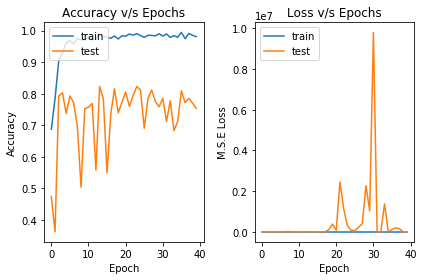

In [0]:
plot_performance(history)

In [0]:
from PIL import Image
import numpy as np

# 적용해볼 이미지 
test_image = '/content/tmp/test/large/SiberianHusky/SiberianHusky (84).jpg'
# 이미지 resize
img = Image.open(test_image)
img = img.convert("RGB")
img = img.resize((227,227))
data = np.asarray(img)
X = np.array(data)
X = X.astype("float") / 256
X = X.reshape(-1, 227, 227,3)
# 예측
pred = model.predict(X)  
result = [np.argmax(value) for value in pred]   # 예측 값중 가장 높은 클래스 반환
print(result[0])
#print('New data category : ',categories[result[0]])

FileNotFoundError: ignored

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

https://github.com/is0332hi/cifar10_alexnet_keras/blob/master/cifar10_alexnet_keras.ipynb